# Agrupamento

In [9]:
import sys
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.io as spio
import matplotlib.pyplot as plt

## Implementando o K-means

In [10]:
data = spio.loadmat("data/ex7data2.mat")
X = data['X']

## Encontrando centróides mais próximos

A função _find\_closest\_centroids_ recebe como parâmetro o conjunto de dados $X$ e um conjunto de centróides. A função itera sobre todos os dados e todos os centróides, calcula a distância euclidiana entre os dois e armazena o valor do centróide mais próximo para cada ponto dos dados. Em seguida é apresentado um gráfico com a atribuição inicial do pontos dos dados aos centróides.

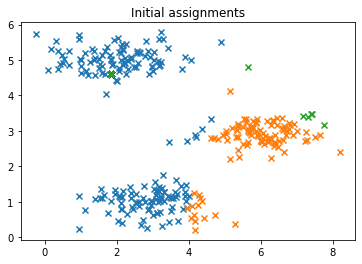

In [19]:
def find_closest_centroids(X, centroids):
    m, n = X.shape
    K = np.size(centroids, 0)
    idx = np.zeros((len(X), 1), dtype=np.int8)
    for i in range(m):
        min_dist = sys.maxsize
        for j in range(K):
            dist = np.sqrt(np.sum((X[i,:] - centroids[j,:]) ** 2))
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)

plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
plt.title('Initial assignments')
plt.show()

## Atualização dos centróides

A função _compute\_centroids_ recebe como parâmetro o conjunto de dados $X$, o índice dos centróides atribuidos para cada ponto, obtido como resultado da função _find\_closest\_centroids_, e a quantidade de centróides. A função itera sobre os índices dos centróides, para cada centróide encontra os pontos atribuídos a ele e computa o novo valor dos centróides utilizando a fórmula abaixo:

$$ \mu_k \gets \frac{1}{\mid C_k \mid} \sum_{i \in C_k} x^{(i)} $$

Onde:

* $C_k$ é o conjunto de exemplos que são atruídos ao centróides $k$ 

In [21]:
def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        indices = np.where(idx == i)[0]
        centroids[i,:] = sum(X[indices,:]) / len(indices)
    return centroids

# Compute initial means
initial_centroids = compute_centroids(X, idx, 3)
print(f'Centróides atualizados: {initial_centroids}')

Centróides atualizados: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## $K$-means aplicado ao conjunto de dados de exemplo

O algoritmo $K$-means é um método iterativo que recebe como entrada o conjunto de dados, os centróides iniciais e o número de iterações que devem ser feitas. Durantes estas iterações o processo atribui a cada ponto o centróide mais próximo e em seguida recalcula o centróide com base nas atribuições. A função _run\_kmeans_ implementa esse processo, e em seguite é apresentado um gráfico com os grupos detectados pelo $K$-means após 10 iterações.

Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


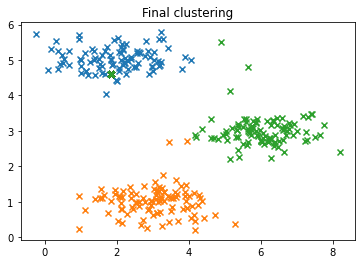

In [23]:
def run_kmeans(X, initial_centroids, max_iters):
    m, n = X.shape
    K = np.size(initial_centroids, 0)
    idx = np.zeros(m)
    centroids = initial_centroids
    for iter in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters)
print('Centroids after the 1st update:\n' + str(centroids))

plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
plt.title('Final clustering')
plt.show()

## Inicialização aleatória

Nas seções anteriores os centróides iniciais foram definidoscom valores fixos. Para casos práticos, um das estratégias utilizadas é inicializar os centróides com valores aleatórios, para isto, a função _kmeans\_init\_centroids_ é utilizada para inicializar os centróides aleatória, em seguite é executado o $K$-means com estes centróides aleatórios e é exibido o gráfico do resultado.

[[2.53446019 1.21562081]
 [6.40773863 2.67554951]
 [7.4949275  2.84018754]]
Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


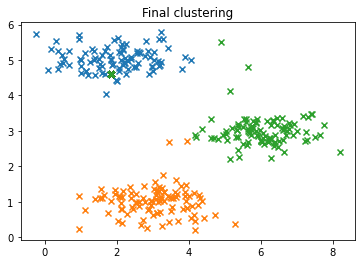

In [25]:
def kmeans_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]

initial_centroids = kmeans_init_centroids(X, K)
print(initial_centroids)

max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters)
print('Centroids after the 1st update:\n' + str(centroids))

plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
plt.title('Final clustering')
plt.show()